In [1]:
# pytorch Tutorial

In [2]:
import torch
import numpy as np


In [3]:
torch.__version__

'2.1.0+cu121'

In [4]:
# # getting the dataset in 
# import requests
# import zipfile

# # download data
# url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'

# r = requests.get(url, allow_redirects=True)
# open('hymenoptera_data.zip', 'wb').write(r.content)

# # unzip data
# with zipfile.ZipFile('hymenoptera_data.zip', 'r') as zip_ref:
#     zip_ref.extractall('.')



## 資料讀取
### torch.utils.data.


In [5]:
# 若要定義自己的數據集，需要繼承 Datasets 抽象類別，以及重新 override __init__()、__getitem__()、__len__()。

from torch.utils.data import Dataset

'''

## template

class myDataset(Dataset):
    def __init__(self):
      # 定義初始化參數
      # 讀取資料集路徑

    def __getitem__(self, index):
      # 讀取每次迭代的資料集中第 idx  資料
      # 進行前處理 (torchvision.Transform 等)
        return 資料和 label

    def __len__(self):
      # 計算資料集總共數量
        return 資料集總數

'''


'\n\n## template\n\nclass myDataset(Dataset):\n    def __init__(self):\n      # 定義初始化參數\n      # 讀取資料集路徑\n\n    def __getitem__(self, index):\n      # 讀取每次迭代的資料集中第 idx  資料\n      # 進行前處理 (torchvision.Transform 等)\n        return 資料和 label\n\n    def __len__(self):\n      # 計算資料集總共數量\n        return 資料集總數\n\n'

In [6]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class ExampleDataset(Dataset):
  def __init__(self):
    self.data = "abcdefghijklmnopqrstuvwxyz"
  
  def __getitem__(self,idx): # if the index is idx, what will be the data?
    return self.data[idx]
  
  def __len__(self): # What is the length of the dataset
    return len(self.data)

dataset1 = ExampleDataset() # create the dataset
dataloader = DataLoader(dataset = dataset1,shuffle = True, batch_size = 1)
for datapoint in dataloader:
  print(datapoint)

['v']
['k']
['r']
['a']
['d']
['i']
['o']
['j']
['m']
['z']
['y']
['w']
['g']
['h']
['s']
['n']
['l']
['e']
['u']
['q']
['f']
['b']
['t']
['p']
['c']
['x']


In [7]:
class ExampleDataset(Dataset):
  def __init__(self):
    self.data = "abcdefghijklmnopqrstuvwxyz"
  
  def __getitem__(self,idx): # if the index is idx, what will be the data?
    if idx >= len(self.data): # if the index >= 26, return upper case letter
      return self.data[idx%26].upper()
    else: # if the index < 26, return lower case, return lower case letter
      return self.data[idx]
  
  def __len__(self): # What is the length of the dataset
    return 4 * len(self.data) # The length is now twice as large

dataset1 = ExampleDataset() # create the dataset
dataloader = DataLoader(dataset = dataset1,shuffle = True,batch_size =26)
for datapoint in dataloader:
  print(datapoint)

['B', 'Y', 'T', 'N', 'u', 'M', 'o', 'O', 'L', 'r', 'z', 'F', 'M', 'F', 'Y', 'I', 'A', 'E', 'I', 'Z', 'J', 'a', 'S', 'e', 'I', 'R']
['m', 'W', 'X', 'X', 'w', 'P', 'C', 'K', 'M', 'B', 'X', 'b', 'V', 'W', 'C', 'H', 'j', 'Z', 'Q', 'O', 'v', 'A', 'g', 'D', 'U', 'N']
['W', 'K', 'C', 'd', 'Y', 'G', 'L', 'E', 'B', 'p', 'x', 'k', 'S', 'h', 's', 'K', 'Z', 'l', 'y', 'U', 'H', 'V', 'E', 'Q', 'q', 'P']
['T', 'i', 'R', 'J', 'P', 'V', 'D', 'G', 'U', 'H', 'L', 'N', 'c', 'O', 'S', 'f', 'Q', 'n', 'R', 'F', 't', 'D', 'J', 'G', 'T', 'A']


## 圖片讀取 - dataset 應用

In [8]:
from torch.utils.data import Dataset
from PIL import Image
import os

### Dataset

In [9]:
class mydataset(Dataset):

    def __init__(self, root_dir, lable_dir):
        self.root_dir = root_dir
        self.label_dir = lable_dir
        self.path = os.path.join(self.root_dir, self.label_dir)
        self.img_path = os.listdir(self.path)

    def __getitem__(self, idx):
        img_name = self.img_path[idx]
        img_item_path = os.path.join(self.root_dir, self.label_dir, img_name)
        img = Image.open(img_item_path)
        label = self.label_dir
        
        return img, label

    def __len__(self):
        return len(self.img_path)
    

root_dir = r"hymenoptera_data\train"
label_dir_ants = "ants"
label_dir_bees = "bees"

# 圖片物件實體化
ants_lable_set = mydataset(root_dir, label_dir_ants)
bees_lable_set = mydataset(root_dir, label_dir_bees)

# 數據拼接
training_data = ants_lable_set + bees_lable_set

In [10]:
# 讀取圖片內容
img, label = ants_lable_set[29]
img.show()

img, label = bees_lable_set[29]
img.show()


### BLOB file w/ label encoding

In [11]:
# from torchvision.datasets import ImageFolder
# image_folder = ImageFolder('./hymenoptera_data/train', transform=None, target_transform=None)
# print(image_folder.class_to_idx)

FileNotFoundError: Found no valid file for the classes ants_label, bees_label. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [ ]:
## 把圖片和label想像成一個巢狀物件關係
## 1張圖片可以有多個label，一般會建立一個對應的txt檔案來儲存這些關係

import os 

root_dir = "hymenoptera_data/train"
target_dir = "bees"
img_path = os.listdir(os.path.join(root_dir, target_dir))

out_dir = os.path.join(root_dir, target_dir + "_label")
if not os.path.exists(out_dir):
    os.makedirs(out_dir)


for i in img_path:
    file_name = i.split(".jpg")[0]
    with open(os.path.join(out_dir, file_name + ".txt"), "w") as f:
        f.write(target_dir)



## 圖片讀取 - dataset 整合到 dataloader

In [35]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import numpy as np
from PIL import Image
import os
from torchvision import transforms
from torch.utils.tensorboard import SummaryWriter
from torchvision.utils import make_grid

writer = SummaryWriter("logs")

class MyData(Dataset):
    def __init__(self, root_dir, image_dir, label_dir, transform):
        self.root_dir = root_dir
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_path = os.path.join(self.root_dir, self.image_dir) # 資料夾路徑 圖片
        self.label_path = os.path.join(self.root_dir, self.label_dir) # 資料夾路徑 標籤
        self.image_list = os.listdir(self.image_path) # 圖片列表
        self.label_list = os.listdir(self.label_path) # 標籤列表
        self.transform = transform
        # 因为label 和 Image文件名相同，进行一样的排序，可以保证取出的数据和label是一一对应的
        self.image_list.sort()
        self.label_list.sort()

    def __getitem__(self, idx):
        img_name = self.image_list[idx]
        label_name = self.label_list[idx]
        img_item_path = os.path.join(self.root_dir, self.image_dir, img_name) # 單一圖片路徑
        label_item_path = os.path.join(self.root_dir, self.label_dir, label_name) # 單一標籤路徑
        img = Image.open(img_item_path)

        with open(label_item_path, 'r') as f:
            label = f.readline()

        label_en = -1
        if label == "ants":
            label_en = 0
        elif label == "bees":
            label_en = 1
        else:
            label_en = 2
        
        # img = np.array(img) # 轉換成 numpy array
        img = self.transform(img) # 轉換成　tensor
        sample = {'img': img, 'label': label, 'label_en': label_en}
    
        return sample

    def __len__(self):
        assert len(self.image_list) == len(self.label_list)
        return len(self.image_list)

if __name__ == '__main__':
    transform = transforms.Compose([
                  transforms.Resize((256, 256)),
                  transforms.ToTensor(),
                #   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                  ])

    root_dir = "hymenoptera_data/train"
    image_ants = "ants"
    label_ants = "ants_label"
    ants_dataset = MyData(root_dir, image_ants, label_ants, transform)
    image_bees = "bees"
    label_bees = "bees_label"
    bees_dataset = MyData(root_dir, image_bees, label_bees, transform)
    # Correctly concatenate datasets
    train_dataset = ConcatDataset([ants_dataset, bees_dataset])

    # Use num_workers=0 for debugging purposes
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0, drop_last=False)

    for i_batch, sample_batched in enumerate(train_loader):
        print(i_batch, sample_batched['img'].size(), sample_batched['label'])
        grid = make_grid(sample_batched['img'])
        writer.add_image('images', grid, 0)
        # Remove or correct the add_graph line
        break   # Correctly ends the loop after one iteration

    


0 torch.Size([4, 3, 256, 256]) ['bees', 'ants', 'ants', 'ants']


<class 'dict'>
第 0 批次，組類 torch.Size([4, 3, 256, 256])


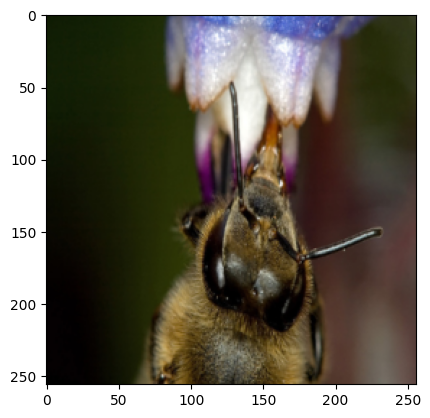

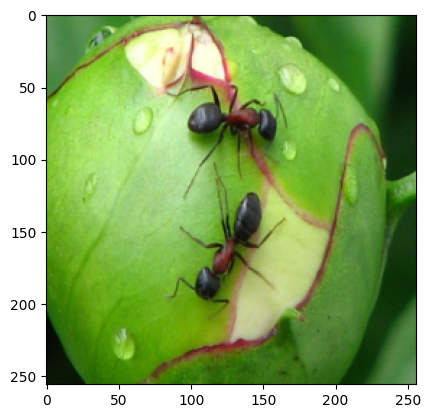

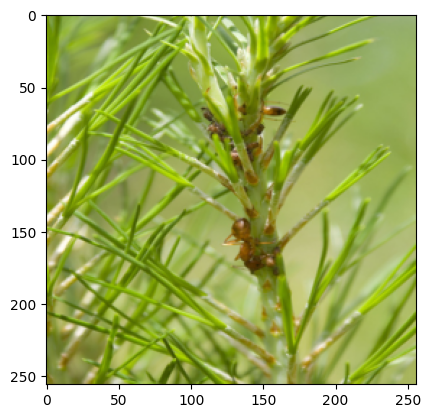

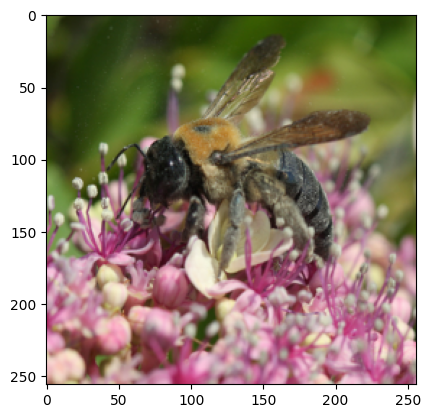

In [49]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torchvision.transforms as transforms
# image = train_dataset[232]["img"]
# image # torch.Size([3, 256, 256])


for i, j in enumerate(train_loader):
    print(type(j))
    print(f"第 {i} 批次，組類 {j['img'].shape}")
    
    # Convert tensor to PIL image
    for i in range(j['img'].shape[0]):
        pil_image = transforms.ToPILImage()(j['img'][i])
        plt.imshow(pil_image)
        plt.show()

    break

# Convert tensor to PIL image
# pil_image = transforms.ToPILImage()(image)
# # Display the PIL image
# pil_image
